In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pk
import scipy.linalg as sc
from MRPy import MRPy

with open('resources/data/sample_KM.pk', 'rb') as target:
    K1, M1, K2, M2, K3, M3 = pk.load(target)

In [3]:
def vibration_modes(K,M):
    w2, Phi = sc.eig(K,M)
    iw = w2.argsort()
    w2 = w2[iw]
    Phi = Phi[:,iw]
    wk = np.sqrt(np.real(w2))
    fk = wk/2/np.pi
    return fk, wk, Phi

In [14]:
fk1, wk1, Phi1 = vibration_modes(K1,M1)
print(fk1)
print(wk1)
Phi1 = Phi1

[ 3.93785233 13.28874904 23.0790977  32.38000947 36.76923945]
[ 24.74225587  83.49567274 145.01024754 203.44959974 231.02794509]


In [6]:
Mi = np.dot(np.dot(Phi1.T,M1), Phi1)
Mi = np.diag(Mi)
print(Mi)

print(Phi1[:,0])

[2000. 2000. 2000. 2000. 2000.]
[0.2901579 0.4993386 0.5770084 0.4993386 0.2901579]


In [7]:
u0 = np.array([[0.290, 0.500, 0.577, 0.500, 0.290]]).T
v0 = np.array([[0.000, 0.000, 0.000, 0.000, 0.000]]).T

In [8]:
qMu0 = np.dot(np.dot(Phi1.T,M1), u0)
qMv0 = np.dot(np.dot(Phi1.T,M1), v0)

print(qMu0.T)
print(qMv0.T)

[[ 2.00112808e+03  2.27373675e-13 -3.09544927e-01  1.13686838e-13
  -1.52673952e+00]]
[[0. 0. 0. 0. 0.]]


In [9]:
thi = np.zeros_like(Mi);
u0i = np.zeros_like(Mi);

for k in range(5):
    if (u0[k] != 0 and v0[k] != 0):
        # V0 + U0
        thi[k] = np.arctan((qMu0[k]/qMv0[k])*wk1[k])
        u0i[k] = qMu0[k]/Mi[k]/np.sin(thi[k])
    elif (u0[k] != 0):
        # APENAS U0
        thi[k] = np.pi/2
        u0i[k] = qMu0[k]/Mi[k]/np.sin(thi[k])
    elif (v0[k] != 0):
        # APENAS V0
        thi[k] = np.arctan((qMu0[k]/qMv0[k])*wk1[k])
        u0i[k] = qMv0[k]/Mi[k]/np.cos(thi[k])/wk1[k]
    else:
        thi[k] = np.pi/2
        u0i[k] = qMu0[k]/Mi[k]/np.sin(thi[k])
    print('Mode {0} with phase {1:5.2f} rad and amplitude {2:7.2f}mm'.format(k+1, thi[k], 1000*u0i[k]))
        

Mode 1 with phase  1.57 rad and amplitude 1000.56mm
Mode 2 with phase  1.57 rad and amplitude    0.00mm
Mode 3 with phase  1.57 rad and amplitude   -0.15mm
Mode 4 with phase  1.57 rad and amplitude    0.00mm
Mode 5 with phase  1.57 rad and amplitude   -0.76mm


[[<matplotlib.lines.Line2D at 0x2da126479d0>],

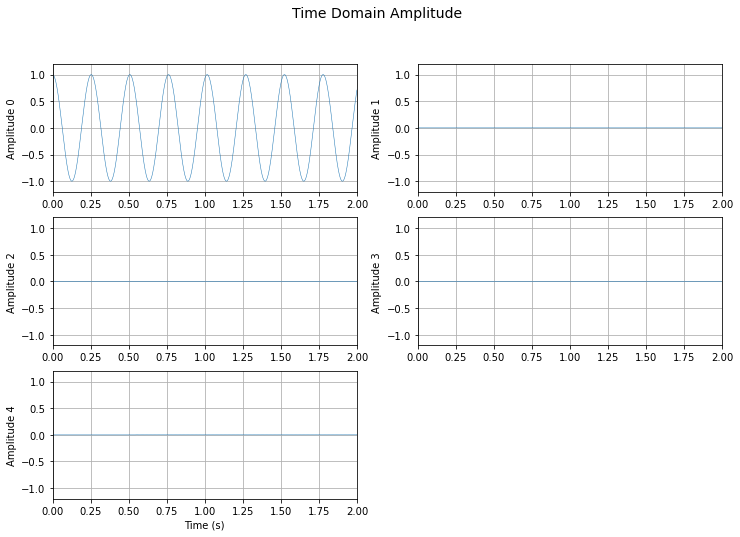

In [10]:
uk = MRPy.harmonic(NX = 5, N=2048*5, fs=1024*5, X0 = u0i, f0=fk1, phi=thi)
# uk = respostas modais -> respostas de cada modo de vibração
# a resposta geral do sistema é uma superposição dessas respostas com a matriz de autovetores, que dá o escalar multiplicador de cada grau de liberdade para cada um dos modos.
uk.plot_time()

[[<matplotlib.lines.Line2D at 0x2da138f3ca0>],

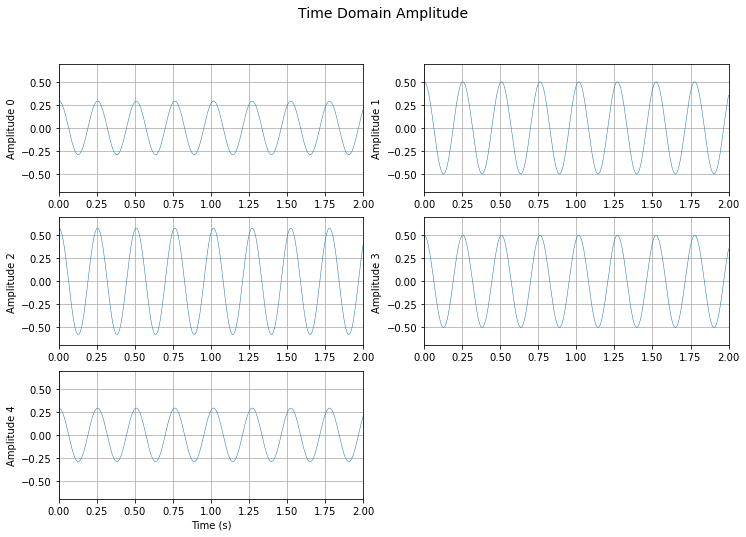

In [11]:
uN = MRPy(np.dot(Phi1, uk), fs=1024*5)
uN.plot_time()

[ 3.93785233 13.28874904 23.0790977  32.38000947 36.76923945]


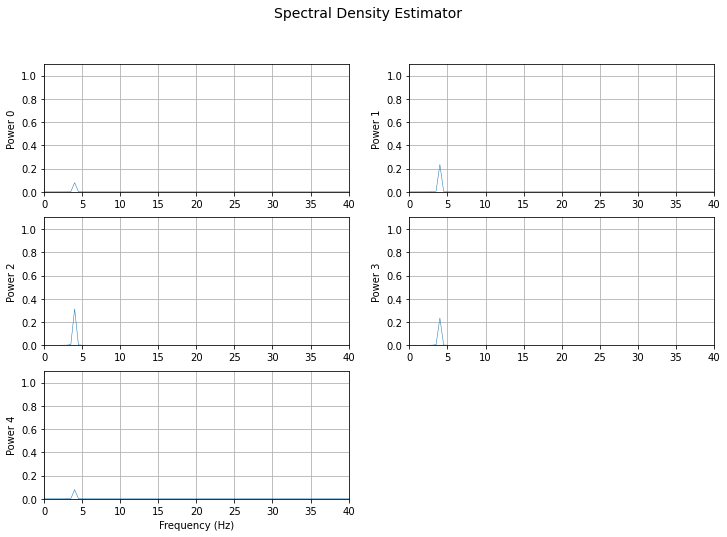

In [12]:
uN.plot_freq(axis_f=(0, 40, 0.0, 11e-1))
print(fk1)